In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.utils import resample ## Used for sampling the data
# from sklearn.cross_validation import cross_val_score, KFold
# from scipy.stats import sem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cc = pd.read_csv('/content/drive/MyDrive/sample_data/creditcard.csv')

In [ ]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
cc.shape

(284807, 31)

In [ ]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
cc.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
Y = cc['Class']

In [ ]:
Y.count()

284807

In [ ]:
X = cc.drop(['Class'], axis = 1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
## Preparing the Training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 10)

X_train.shape

In [ ]:
Y_train.shape

(227845,)

In [ ]:
X_test.shape

(56962, 30)

In [ ]:
Y_train.shape

(227845,)

****Applying k in knn with geridSearch cv****

In [ ]:
k_range = list(range(1,20))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)


knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit( X_train,Y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)


0.9984375348657947
{'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


,precision_score(Y_test, y_knn_predict)
, f1_score(Y_test,y_knn_predict)

In [ ]:
K_list=list(range(1,20))

#create empty list
cv_scores=[]

#perform K search
for k in K_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    


The optimal number of neighbors is 3


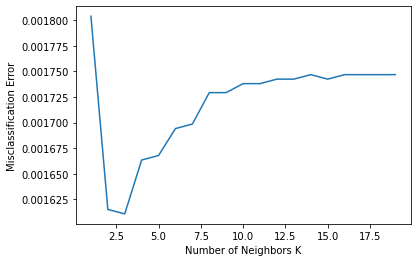

In [ ]:
#Plotting misclassification error

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = K_list[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(K_list, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [ ]:


#Look how the number of neighbors drastically increases the MSE rate

# Try KNN to see how well it predicts fraud on the undersampled dataset
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit( X_train,Y_train)
y_knn_predict=knn.predict(X_test)
print (accuracy_score(y_test, y_knn_predict))
print(classification_report(y_test, y_knn_predict))

NameError: ignored

In [ ]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,Y_train)
y_knn_predict=knn.predict(X_test)
print("Knn without resampling")
print("")
print("Accuracy Score:",accuracy_score(Y_test, y_knn_predict))
print("Precision_Score:",precision_score(Y_test, y_knn_predict))
print("Recall Score:",recall_score(Y_test, y_knn_predict))
print("F1 Score:", f1_score(Y_test,y_knn_predict))
cm = confusion_matrix(Y_test, y_knn_predict)
sns.heatmap(cm, annot=True)

**Let us run Logistic regression and evaluate the performance metrics**

In [ ]:
## Logistic Regression
lr_model = LogisticRegression(solver='liblinear').fit(X_train,Y_train)

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
print("Logistic Regression Metrics Without Resampling:")
print("")
print("Accuracy Score:",accuracy_score(Y_test, lr_pred))
print("Precision Score:",precision_score(Y_test, lr_pred))
print("Recall Score:",recall_score(Y_test, lr_pred))
print("F1 Score:", f1_score(Y_test,lr_pred))
cm = confusion_matrix(Y_test,lr_pred)
sns.heatmap(cm, annot=True)

** Let us run Random Forest and evaluate the performance Metrics**

In [ ]:
## Random Forest Classifier 

rf = RandomForestClassifier(n_estimators=10)

In [ ]:
rf_model = rf.fit(X_train, Y_train)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
print("Random Forest Metrics Without Resampling:")
print("")
print("Accuracy Score:",accuracy_score(Y_test, rf_pred))
print("Precision Score:",precision_score(Y_test, rf_pred))
print("Recall Score:", recall_score(Y_test, rf_pred))
print("F1 Score", f1_score(Y_test, rf_pred))
#cm = confusion_matrix(Y_test, rf_pred)
#sns.heatmap(cm, annot=True)

**Oversampling minorty class** 

In [ ]:
# concatenate our training data back together

X = pd.concat([X_train, Y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
245582,152815.0,-3.678592,-2.185288,2.145642,-0.108133,5.326785,-3.320732,-4.715889,-0.676015,1.203082,0.122248,-0.998946,0.722797,0.097223,-0.069469,0.555198,0.312797,-0.542846,-0.443595,-0.289707,-1.528738,0.281099,-1.687634,-5.947433,0.991956,-0.871129,-0.674865,0.526634,0.318034,24.99,0
33921,37440.0,1.289134,0.467212,-1.035215,0.348510,0.965128,0.162317,0.188477,0.053558,-0.333772,-0.471211,0.820937,0.263504,0.112597,-0.877801,0.584377,0.757287,0.346576,0.624814,0.119817,-0.051953,-0.147832,-0.362923,-0.230544,-1.427948,0.650917,0.465196,-0.022903,0.009328,0.76,0
18808,29784.0,0.824080,-1.197571,1.671425,0.999394,-1.540596,1.480644,-1.451232,0.713797,1.952104,-0.394010,-0.035874,0.682330,-1.527577,-0.773465,-1.650429,-0.260905,0.332446,0.202658,0.317479,0.017694,0.162967,0.668738,-0.229503,-0.232408,0.256959,0.741650,0.042034,0.029245,125.00,0
52806,45653.0,-0.763642,1.153200,0.845734,-0.287226,-0.005743,-0.137666,0.255488,0.578325,-0.713008,-0.368070,0.344865,0.312627,-0.238789,0.685221,0.213261,0.779793,-0.754736,0.505755,0.608803,0.036340,-0.183093,-0.678964,-0.037631,-0.529925,-0.096189,0.108287,0.126774,0.039826,19.98,0
200909,133638.0,1.986009,-0.337558,-0.418934,0.369815,-0.360600,-0.012716,-0.588175,-0.005277,1.276081,-0.217711,-0.858090,1.082105,1.396117,-0.461902,0.438668,0.020872,-0.582864,0.032603,-0.253831,-0.113618,0.199920,0.863473,0.130956,0.660961,-0.034146,-0.240472,0.047897,-0.028392,9.99,0


**we will apply resample function from sklearn**

In [ ]:
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# concatinate the upsampled minority class with the majority class
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    227447
0    227447
Name: Class, dtype: int64

No handles with labels found to put in legend.


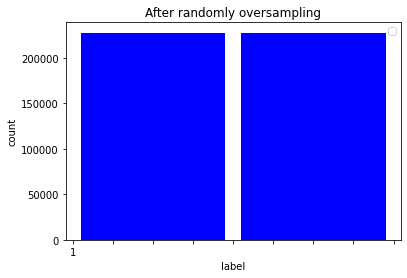

In [ ]:
upsampled_not_fraud = X[X.Class==0]
upsampled_fraud = X[X.Class==1]

data = np.array([[227447], [227447]])
data_std = np.array([[1 ], [1]])    

length = len(data)
x_labels = ['0', '1']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.9 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='blue')

ax.set_ylabel('count')
# ax.set_ylim(0,100)
# ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('label')
ax.set_title('After randomly oversampling')
ax.legend()
# plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# fig.tight_layout()
plt.show()

**We can see the Fraud and Non Fraud rows are same in count. Now we will run classifier algorithm and check whether the metrics parameter changed or not.**

In [ ]:
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis = 1)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

**Apply Knn **

In [ ]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_knn_predict=knn.predict(X_test)
print("Knn model After Randomly Oversampling minority class:")
print("")
print("Accuracy Score:",accuracy_score(Y_test,y_knn_predict))
print("Precision Score:",precision_score(Y_test,y_knn_predict))
print("Recall Score:", recall_score(Y_test,y_knn_predict))
print("F1 Score", f1_score(Y_test,y_knn_predict))
cm = confusion_matrix(Y_test,y_knn_predict)
sns.heatmap(cm, annot=True)


In [ ]:
## Logistic Regression
lr_model2 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [ ]:
lr_pred2 = lr_model2.predict(X_test)

In [ ]:
print("Logistic Regression model Evaluation Metrics after Random Oversampling minority class:")
print("")
print("Accuracy Score:",accuracy_score(Y_test,lr_pred2))
print("Precision Score:",precision_score(Y_test,lr_pred2))
print("Recall Score:", recall_score(Y_test,lr_pred2))
print("F1 Score", f1_score(Y_test,lr_pred2))
cm = confusion_matrix(Y_test,lr_pred2)
sns.heatmap(cm, annot=True)


In [ ]:
## Random Forest Classifier 

rf = RandomForestClassifier(n_estimators=10)

In [ ]:
rf_model2 = rf.fit(X_train, y_train)

In [ ]:
rf_pred2 = rf_model2.predict(X_test)

In [ ]:
print("Random Forest Metrics after Oversampling minority class:")
print("")
print("Accuracy Score:",accuracy_score(Y_test, rf_pred2))
print("Precision Score:",precision_score(Y_test, rf_pred2))
print("Recall Score:", recall_score(Y_test, rf_pred2))
print("F1 Score", f1_score(Y_test, rf_pred2))
cm = confusion_matrix(Y_test, rf_pred2)
sns.heatmap(cm, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE
# Separate input features and target
y = cc.Class
X = cc.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
sm = SMOTE(random_state=12, ratio=1.0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(454914,)

In [ ]:
X_train, y_train = sm.fit_sample(X_train, y_train)
y_train.shape

**Running knn**

Knn after Metrics after SMOTE:

Accuracy Score: 0.9182261858783048
Precision Score: 0.0015290519877675841
Recall Score: 0.07446808510638298
F1 Score 0.0029965753424657537


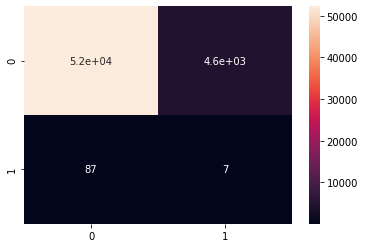

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_knn_predict=knn.predict(X_test)
print("Knn after Metrics after SMOTE:")
print("")
print("Accuracy Score:",accuracy_score(Y_test,y_knn_predict))
print("Precision Score:",precision_score(Y_test,y_knn_predict))
print("Recall Score:", recall_score(Y_test,y_knn_predict))
print("F1 Score", f1_score(Y_test,y_knn_predict))
cm = confusion_matrix(Y_test,y_knn_predict)
sns.heatmap(cm, annot=True)

**Running Logistic regression**

In [ ]:
lr_pred_smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = lr_pred_smote.predict(X_test)


In [ ]:
print("Logistic Regression Metrics after SMOTE:")
print("")
print("Accuracy Score:",accuracy_score(y_test,smote_pred))
print("Precision Score:",precision_score(y_test,smote_pred))
print("Recall Score:", recall_score(y_test,smote_pred))
print("F1 Score", f1_score(y_test,smote_pred))
cm = confusion_matrix(y_test,smote_pred)
sns.heatmap(cm, annot=True)

**Running Random Forest**

In [ ]:
rf_pred_smote = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

rf_smote_pred = rf_pred_smote.predict(X_test)


In [ ]:
print("Random Forest Metrics after SMOTE:")
print("")
print("Accuracy Score:",accuracy_score(y_test, rf_smote_pred))
print("Precision Score:",precision_score(y_test, rf_smote_pred))
print("Recall Score:", recall_score(y_test, rf_smote_pred))
print("F1 Score", f1_score(y_test, rf_smote_pred))
cm = confusion_matrix(y_test, rf_smote_pred)
sns.heatmap(cm, annot=True)

**We can see the Recall score has increased significantly after the SMOTE**

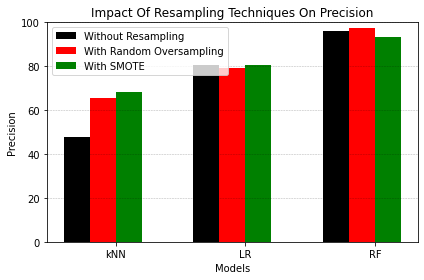

In [ ]:
data = np.array([[47.84, 65.46, 68.15 ], [80.56, 79.38, 80.74], [96.03, 97.30, 93.52]])
data_std = np.array([[1, 2, 3 ], [1, 2 , 3], [1, 2 ,3 ]])    

length = len(data)
x_labels = ['kNN', 'LR', 'RF']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='black', label='Without Resampling')
ax.bar(x + width, data[:,1], width, color='r', label='With Random Oversampling')
ax.bar(x + width + width, data[:,2], width, color='g', label='With SMOTE')

ax.set_ylabel('Precision')
ax.set_ylim(0,100)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Models')
ax.set_title('Impact Of Resampling Techniques On Precision')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

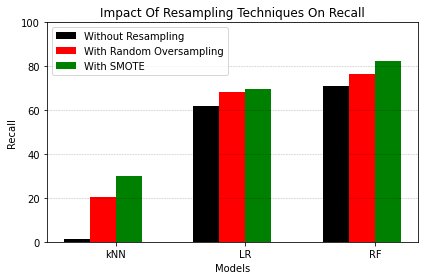

In [ ]:
data = np.array([[01.06, 20.21, 30.16 ], [61.70, 68.17, 69.54], [71.23, 76.60, 82.62]])
data_std = np.array([[1, 2, 3 ], [1, 2 , 3], [1, 2 ,3 ]])    

length = len(data)
x_labels = ['kNN', 'LR', 'RF']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='black', label='Without Resampling')
ax.bar(x + width, data[:,1], width, color='r', label='With Random Oversampling')
ax.bar(x + width + width, data[:,2], width, color='g', label='With SMOTE')

ax.set_ylabel('Recall')
ax.set_ylim(0,100)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Models')
ax.set_title('Impact Of Resampling Techniques On Recall')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

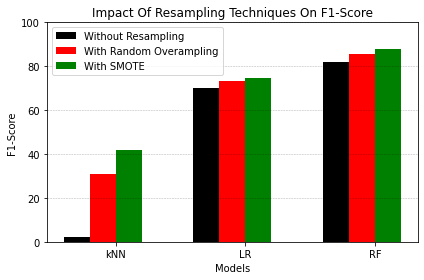

In [ ]:
data = np.array([[02.08 , 30.89 , 41.81 ], [69.88 , 73.35 , 74.72], [81.79 , 85.71 , 87.78]])
data_std = np.array([[1, 2, 3 ], [1, 2 , 3], [1, 2 ,3 ]])    

length = len(data)
x_labels = ['kNN', 'LR', 'RF']

# Set plot parameters
fig, ax = plt.subplots()
width = 0.2 # width of bar
x = np.arange(length)

ax.bar(x, data[:,0], width, color='black', label='Without Resampling')
ax.bar(x + width, data[:,1], width, color='r', label='With Random Overampling')
ax.bar(x + width + width, data[:,2], width, color='g', label='With SMOTE')

ax.set_ylabel('F1-Score')
ax.set_ylim(0,100)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Models')
ax.set_title('Impact Of Resampling Techniques On F1-Score')
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()